## Imports

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
import random

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import torch
import torchvision.transforms as transforms

## Loading the dataset

Dataset can be found at: https://www.kaggle.com/datasets/ardamavi/27-class-sign-language-dataset

In [3]:
X = np.load("../dataset/X.npy")
y = np.load("../dataset/Y.npy")

## Dataset shapes

In [4]:
X.shape

(22801, 128, 128, 3)

In [5]:
y.shape

(22801, 1)

## Number of instances

In [6]:
n_instances = X.shape[0]
n_instances

22801

## Number of classes and their values

In [7]:
classes_names = np.unique(y)
n_classes = len(classes_names)
print(f'Number of classes is {n_classes}.', f'Their labels are {classes_names}.', sep='\n')

Number of classes is 27.
Their labels are ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' 'NULL' 'a' 'b' 'bye' 'c' 'd' 'e'
 'good' 'good morning' 'hello' 'little bit' 'no' 'pardon' 'please'
 'project' 'whats up' 'yes'].


## Visualizing few instances and their labels

##### Generating $k$ random numbers from $0, ..., n\_instances-1 $ to visualize $k$ instances from the dataset

In [8]:
k = 51

In [9]:
indices = random.sample(range(n_instances), k)
print(indices)

[19660, 11739, 12021, 2342, 21614, 4450, 16155, 19321, 10323, 7045, 14079, 15388, 8930, 15639, 19119, 8156, 2719, 4883, 7732, 20529, 19584, 1139, 22144, 2309, 20777, 12886, 3000, 4136, 3451, 17563, 14130, 1085, 7546, 8877, 13048, 11821, 16435, 10865, 13387, 10157, 14695, 22029, 10685, 7060, 20228, 8670, 22719, 10483, 5589, 508, 18128]


##### Visualizing k instances 

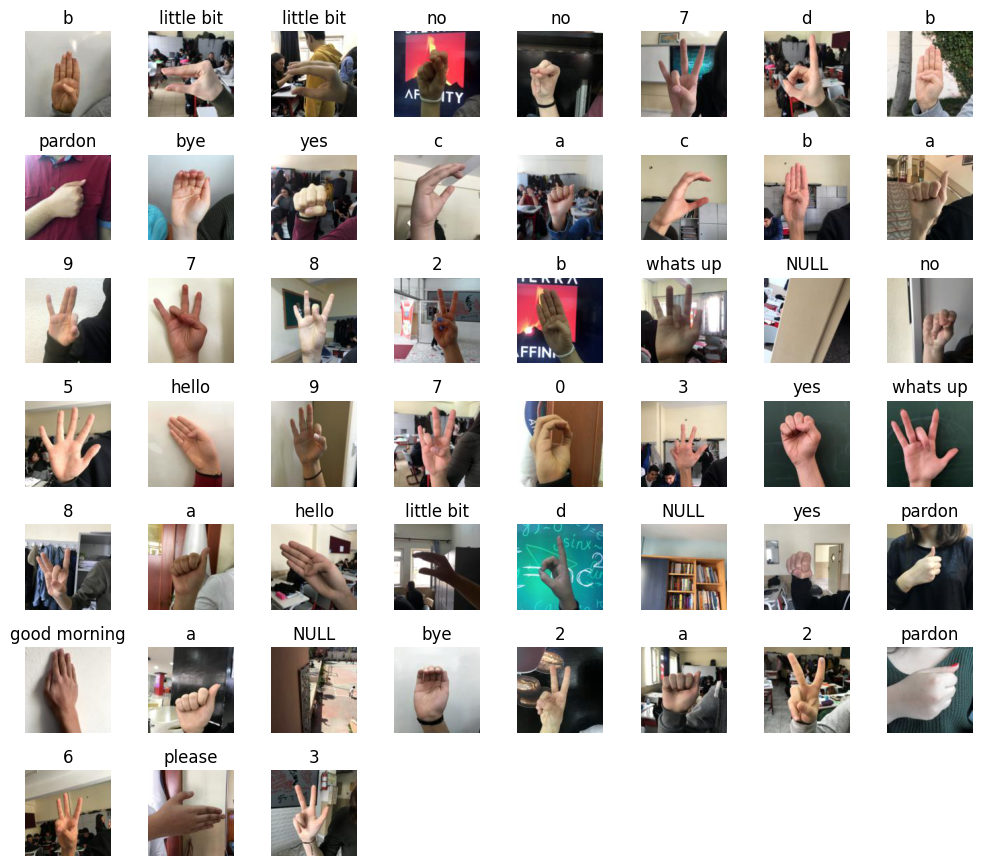

In [10]:
plt.figure(figsize=(10, 10))

for i in range(k):
    plt.subplot(int(np.ceil(np.sqrt(k))), int(np.ceil(np.sqrt(k))), i + 1)
    plt.imshow(X[indices[i]])
    plt.title(y[indices[i]][0])
    plt.axis('off')

plt.tight_layout()
plt.show()

## Number of instances per class
### Checking if dataset is well balanced

In [11]:
y_series = pd.Series(np.ravel(y))
class_counts = y_series.value_counts()
class_counts

b               866
0               866
please          865
whats up        865
2               865
3               865
d               865
c               865
good morning    865
yes             865
hello           865
little bit      865
good            865
5               865
pardon          865
project         865
8               865
bye             865
1               865
6               865
7               865
9               865
no              865
4               864
a               863
e               863
NULL            314
Name: count, dtype: int64

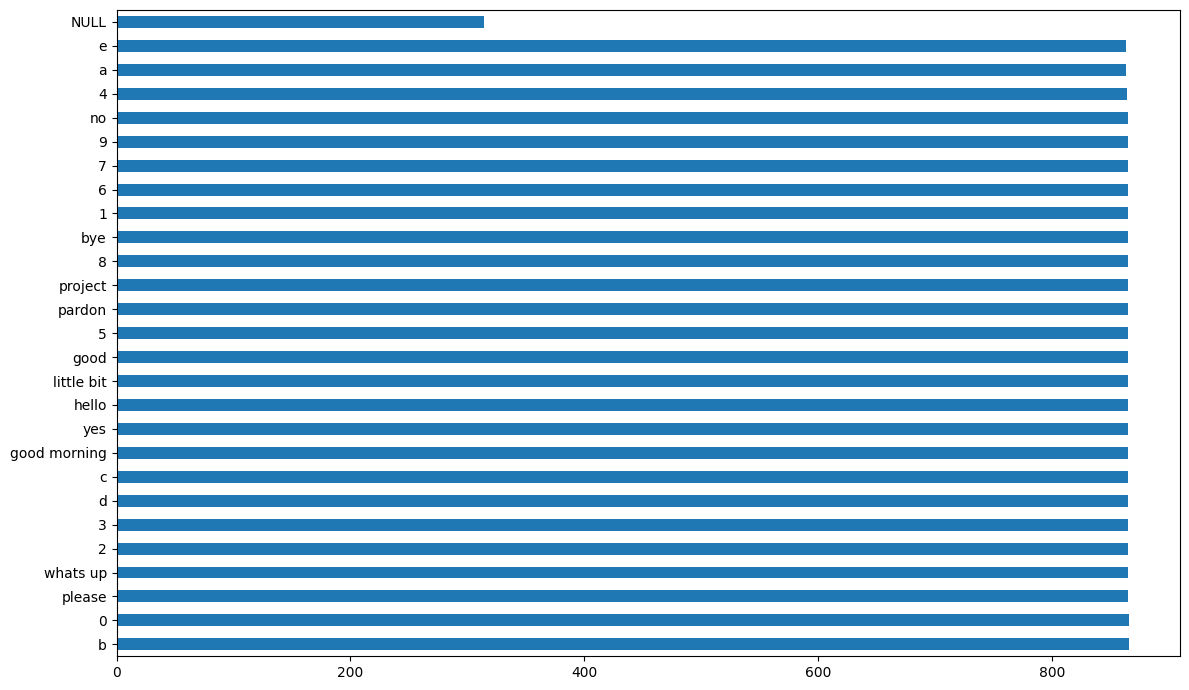

In [12]:
plt.figure(figsize=(12,7))
class_counts.plot(kind='barh')

plt.tight_layout()

## Transforming the dataset

In [14]:
image_size=32
mean=0
stddev=1

In [15]:
# Transforming X
X = X.astype(np.float32)

transform = transforms.Compose([
    transforms.ToPILImage(),                          # Converting to PIL
    transforms.Resize((image_size, image_size)),      # Resizing 
    transforms.ToTensor(),                            # Converting to tensor
    transforms.Normalize((mean,), (stddev,))          # Normalizing
])

X_transformed = torch.stack([transform(image) for image in X])

In [17]:
# Transfomring y
label_encoder = LabelEncoder()                          
y_encoded = label_encoder.fit_transform(y.ravel())
y_transformed = torch.tensor(y_encoded)

In [18]:
# Checking the shapes
X_transformed.shape, y_transformed.shape

(torch.Size([22801, 3, 32, 32]), torch.Size([22801]))

## Spliting the dataset

In [19]:
train_size = 0.8

In [20]:
X_train, X_temp, y_train, y_temp = train_test_split(X_transformed, y_transformed, train_size=train_size, random_state=42)

In [21]:
test_size = 0.5

In [22]:
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=test_size, random_state=42)

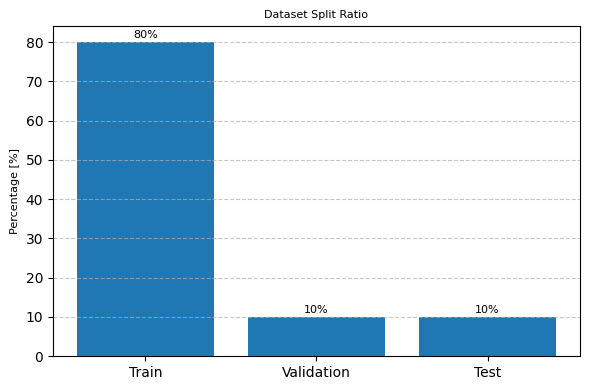

In [50]:
categories = ['Train', 'Validation', 'Test']
values = [80, 10, 10]

plt.figure(figsize=(6, 4))
plt.bar(categories, values)

plt.ylabel('Percentage [%]', fontsize=8)
plt.title('Dataset Split Ratio', fontsize=8)

plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(values):
    plt.text(i, v + 1, str(v) + '%', ha='center', fontsize=8)

plt.tight_layout()

## Saving split dataset

In [38]:
# Making folders for each dataset
train_folder = '../train'
os.makedirs(train_folder, exist_ok=True)

valid_folder = '../valid'
os.makedirs(valid_folder, exist_ok=True)

test_folder = '../test'
os.makedirs(test_folder, exist_ok=True)

# Define the file paths
X_train_file_path = os.path.join(train_folder, 'X_train.pt')
X_valid_file_path = os.path.join(valid_folder, 'X_valid.pt')
X_test_file_path = os.path.join(test_folder, 'X_test.pt')
y_train_file_path = os.path.join(train_folder, 'y_train.pt')
y_valid_file_path = os.path.join(valid_folder, 'y_valid.pt')
y_test_file_path = os.path.join(test_folder, 'y_test.pt')

# Save the .npy files
torch.save(X_train, X_train_file_path)
torch.save(y_train, y_train_file_path)
torch.save(X_val, X_valid_file_path)
torch.save(y_val, y_valid_file_path)
torch.save(X_test, X_test_file_path)
torch.save(y_test, y_test_file_path)